In [1]:
import yt
import os
import H5
import SimulationIO as SIO
import numpy as np

/home/jmiller/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data Inspection

In [2]:
simple=True
base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
source_dir=base_dir+'/'+'cactus'
fname='iof5-refined-cell'
if simple:
    fname += "-simple"
fname += '.s5'
print fname
fpath=source_dir+'/'+fname

iof5-refined-cell-simple.s5


In [3]:
f = H5.H5File(fpath,H5.H5F_ACC_RDONLY)
project = SIO.readProject(f)

In [4]:
num_grids=2
if not simple:
    num_grids += 1
manifold = project.manifolds.values()[0]
configurationname='iteration.0000000000-timelevel.0'
configuration = project.configurations[configurationname]
manifold = project.manifolds.values()[0]
dimensionality = manifold.dimension
coordinate_system=configuration.coordinatesystems.values()[0].lock()
mds = []
for d in manifold.discretizations.itervalues():
    if d.configuration.name == configurationname and len(d.parent_discretizations) == 0:
        mds.append(d)
base_discretization = mds[0]
subdiscretizations = []
d = base_discretization
discretizations = [d]
while True:
    sds = d.child_discretizations.values()
    if not sds:
        break
    assert len(sds) == 1
    sd = sds[0].lock()
    subdiscretizations.append(sd)
    d = sd.child_discretization
    discretizations.append(d)
num_levels = len(discretizations)
disc = discretizations[1]
blocks = sorted(disc.discretizationblocks.iteritems())
block = [None for i in range(num_grids)]
region = [None for i in range(num_grids)]
active = [None for i in range(num_grids)]
for i in range(num_grids):
    block[i] = sorted(discretizations[i].discretizationblocks.iteritems())[0][-1]
    region[i] = block[i].region
    active[i] = block[i].active

In [18]:
[x for x in subdiscretizations[0].offset]

[0.5, 0.5, 0.5]

In [5]:
for i in range(num_grids):
    print i,region[i]

0 ([0,0,0]:[10,10,10])
1 ([6,6,6]:[12,12,12])


In [6]:
for i in range(num_grids):
    print i,active[i].boxes()[0]

0 ([1,1,1]:[9,9,9])
1 ([7,7,7]:[11,11,11])


In [7]:
ds = yt.load(fpath, 
             configuration='iteration.0000000000-timelevel.0')

yt : [INFO     ] 2016-04-19 18:27:44,910 SimulationIO: Configuration "iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-04-19 18:27:44,911 SimulationIO: Discretization "iteration.0000000000-timelevel.0-level.00"
yt : [INFO     ] 2016-04-19 18:27:44,911 SimulationIO: SubDiscretization "iteration.0000000000-timelevel.0-map.000-level.01"
yt : [INFO     ] 2016-04-19 18:27:44,912 SimulationIO: CoordinateSystem "GRID-iteration.0000000000-timelevel.0"
yt : [INFO     ] 2016-04-19 18:27:44,914 SimulationIO: Field "GRID-iteration.0000000000-timelevel.0-x"
yt : [INFO     ] 2016-04-19 18:27:44,915 SimulationIO: Field "GRID-iteration.0000000000-timelevel.0-y"
yt : [INFO     ] 2016-04-19 18:27:44,916 SimulationIO: Field "GRID-iteration.0000000000-timelevel.0-z"
yt : [INFO     ] 2016-04-19 18:27:44,919 SimulationIO: Setting code units
yt : [INFO     ] 2016-04-19 18:27:44,947 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-04-19 18:27:44,950 Parameters: domain_dimensions       

In [8]:
print ds.grid_dimensions

[[8 8 8]
 [4 4 4]]


In [9]:
ds.print_stats()

[calculate start index]
	 dds =  [ 0.25  0.25  0.25] code_length
	[0 0 0] dimensionless
[calculate start index]
	 dds =  [ 0.125  0.125  0.125] code_length
	[6 6 6] dimensionless
level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	           512	             8
  1	     1	            64	             4
----------------------------------------------
   	     2	           576


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 4.051e-24 Mpc
	Width: 4.051e-18 pc
	Width: 8.356e-13 AU
	Width: 1.250e+01 cm


In [10]:
for grid in ds.index.grids:
    print grid.Parent,grid.Children

None [SimulationIOGrid_0001 ([4 4 4])]
SimulationIOGrid_0000 ([8 8 8]) []


In [11]:
for g in ds.index.grids:
    print g.LeftEdge,g.RightEdge,g.dds

[-1. -1. -1.] code_length [ 1.  1.  1.] code_length [ 0.25  0.25  0.25] code_length
[-0.25 -0.25 -0.25] code_length [ 0.25  0.25  0.25] code_length [ 0.125  0.125  0.125] code_length


In [12]:
"""
g1 = ds.index.grids[0]
g2 = ds.index.grids[1]
g3 = ds.index.grids[2]
print g1.LeftEdge,g1.RightEdge
print g2.LeftEdge,g2.RightEdge
print g3.LeftEdge,g3.RightEdge
print g1.dds/2,g2.dds/2,g3.dds/2
print g1['GRID::z'][0,0,0],g2['GRID::z'][0,0,0],g3['GRID::z'][0,0,0]
print g1.ActiveDimensions,g2.ActiveDimensions,g3.ActiveDimensions
print g1.start_index,g2.start_index,g3.start_index
print g1.stop_index,g2.stop_index,g3.stop_index
print g1.get_global_startindex()
print g2.get_global_startindex()
"""

"\ng1 = ds.index.grids[0]\ng2 = ds.index.grids[1]\ng3 = ds.index.grids[2]\nprint g1.LeftEdge,g1.RightEdge\nprint g2.LeftEdge,g2.RightEdge\nprint g3.LeftEdge,g3.RightEdge\nprint g1.dds/2,g2.dds/2,g3.dds/2\nprint g1['GRID::z'][0,0,0],g2['GRID::z'][0,0,0],g3['GRID::z'][0,0,0]\nprint g1.ActiveDimensions,g2.ActiveDimensions,g3.ActiveDimensions\nprint g1.start_index,g2.start_index,g3.start_index\nprint g1.stop_index,g2.stop_index,g3.stop_index\nprint g1.get_global_startindex()\nprint g2.get_global_startindex()\n"

In [13]:
"""rf = ds.refine_by
gi,cgi = g1.get_global_startindex(),g2.get_global_startindex()
startIndex = np.maximum(0,cgi/rf-gi)
endIndex = np.minimum((cgi+g2.ActiveDimensions) / rf - gi,g1.ActiveDimensions)
endIndexMod = (startIndex==endIndex)
child_mask = np.ones(g1.ActiveDimensions,'bool')
child_mask[startIndex[0]:endIndex[0],startIndex[1]:endIndex[1],startIndex[2]:endIndex[2]]=0
print (cgi+g2.ActiveDimensions) / rf - gi
print g1.ActiveDimensions
print cgi+g2.ActiveDimensions/rf"""

"rf = ds.refine_by\ngi,cgi = g1.get_global_startindex(),g2.get_global_startindex()\nstartIndex = np.maximum(0,cgi/rf-gi)\nendIndex = np.minimum((cgi+g2.ActiveDimensions) / rf - gi,g1.ActiveDimensions)\nendIndexMod = (startIndex==endIndex)\nchild_mask = np.ones(g1.ActiveDimensions,'bool')\nchild_mask[startIndex[0]:endIndex[0],startIndex[1]:endIndex[1],startIndex[2]:endIndex[2]]=0\nprint (cgi+g2.ActiveDimensions) / rf - gi\nprint g1.ActiveDimensions\nprint cgi+g2.ActiveDimensions/rf"

In [14]:
"""np.prod(g1.dds)*np.prod(g1.ActiveDimensions)
np.prod(g2.dds)*np.prod(g2.ActiveDimensions)"""

'np.prod(g1.dds)*np.prod(g1.ActiveDimensions)\nnp.prod(g2.dds)*np.prod(g2.ActiveDimensions)'

In [15]:
"""print rf
print gi,cgi
print startIndex,endIndex
print g1.ActiveDimensions,g2.ActiveDimensions"""

'print rf\nprint gi,cgi\nprint startIndex,endIndex\nprint g1.ActiveDimensions,g2.ActiveDimensions'

In [16]:
ds.derived_field_list

[('gas', 'cell_volume'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dz'),
 ('gas', 'path_element_x'),
 ('gas', 'path_element_y'),
 ('gas', 'path_element_z'),
 ('gas', 'vertex_x'),
 ('gas', 'vertex_y'),
 ('gas', 'vertex_z'),
 ('gas', 'x'),
 ('gas', 'y'),
 ('gas', 'z'),
 ('index', 'cell_volume'),
 ('index', 'cylindrical_r'),
 ('index', 'cylindrical_radius'),
 ('index', 'cylindrical_theta'),
 ('index', 'cylindrical_z'),
 ('index', 'disk_angle'),
 ('index', 'dx'),
 ('index', 'dy'),
 ('index', 'dz'),
 ('index', 'grid_indices'),
 ('index', 'grid_level'),
 ('index', 'height'),
 ('index', 'ones'),
 ('index', 'ones_over_dx'),
 ('index', 'path_element_x'),
 ('index', 'path_element_y'),
 ('index', 'path_element_z'),
 ('index', 'spherical_phi'),
 ('index', 'spherical_r'),
 ('index', 'spherical_radius'),
 ('index', 'spherical_theta'),
 ('index', 'vertex_x'),
 ('index', 'vertex_y'),
 ('index', 'vertex_z'),
 ('index', 'x'),
 ('index', 'y'),
 ('index', 'z'),
 ('index', 'zeros'),
 ('simulationio', 'GRID

In [17]:
print ds.domain_width

[ 2.  2.  2.] code_length


In [18]:
print ds.index.grid_left_edge
print ds.index.grid_right_edge

[[-1.   -1.   -1.  ]
 [-0.25 -0.25 -0.25]] code_length
[[ 1.    1.    1.  ]
 [ 0.25  0.25  0.25]] code_length


In [19]:
g = ds.index.grids[0]

In [20]:
print ds.subdiscretizations
print ds.index.grids[0].Children,ds.index.grids[0].Parent
print ds.index.grids[1].Children,ds.index.grids[-1].Parent
print len(ds.discretizations) == len(ds.index.grids)
for i,d in enumerate(ds.discretizations):
    print i
    print "\t",d.parent_discretizations.values()
    print "\t",d.child_discretizations.values()
    print "\t",d == ds.base_discretization

[<SimulationIO.SubDiscretization; proxy of <Swig Object of type 'std::shared_ptr< SubDiscretization > *' at 0x7f26dd692690> >]
[SimulationIOGrid_0001 ([4 4 4])] None
[] SimulationIOGrid_0000 ([8 8 8])
True
0
	[]
	[<SimulationIO.weak_ptr_SubDiscretization; proxy of <Swig Object of type 'std::weak_ptr< SubDiscretization > *' at 0x7f26db4b5d50> >]
	True
1
	[<SimulationIO.weak_ptr_SubDiscretization; proxy of <Swig Object of type 'std::weak_ptr< SubDiscretization > *' at 0x7f26db4b5ea0> >]
	[]
	False


In [21]:
for f in ds.field_list:
    fv = g[f]
    if fv.size == 0: continue
    print f, fv.min(), fv.max()

yt : [INFO     ] 2016-04-19 18:27:45,525 SimulationIO: Reading field "GRID::r"


('simulationio', 'GRID::r') 0.216506350946 dimensionless 1.51554445662 dimensionless


yt : [INFO     ] 2016-04-19 18:27:45,532 SimulationIO: Reading field "GRID::x"


('simulationio', 'GRID::x') -0.875 dimensionless 0.875 dimensionless


yt : [INFO     ] 2016-04-19 18:27:45,547 SimulationIO: Reading field "GRID::y"


('simulationio', 'GRID::y') -0.875 dimensionless 0.875 dimensionless


yt : [INFO     ] 2016-04-19 18:27:45,552 SimulationIO: Reading field "GRID::z"


('simulationio', 'GRID::z') -0.875 dimensionless 0.875 dimensionless


In [22]:
sp = ds.sphere([0.0, 0.0, 0.0], (0.25, 'm'))

In [23]:
print sp

YTSphere (iof5-refined-cell-simple.s5): , center=[ 0.  0.  0.] m, radius=0.25 m


In [24]:
print sp.quantities.keys()

['SpinParameter', 'MinLocation', 'WeightedVariance', 'TotalMass', 'AngularMomentumVector', 'WeightedAverageQuantity', 'SampleAtMaxFieldValues', 'TotalQuantity', 'CenterOfMass', 'BulkVelocity', 'Extrema', 'MaxLocation', 'SampleAtMinFieldValues']


In [25]:
print sp.quantities.total_quantity('ones')

32.0 dimensionless


In [26]:
print sp.quantities.extrema('GRID::r')

yt : [INFO     ] 2016-04-19 18:27:45,687 SimulationIO: Reading field "GRID::r"


[ 0.10825318  0.20728905] dimensionless


In [27]:
print sp.quantities.total_quantity('GRID::x')

yt : [INFO     ] 2016-04-19 18:27:45,710 SimulationIO: Reading field "GRID::x"


0.0 dimensionless


In [28]:
ds.domain_left_edge

YTArray([-1., -1., -1.]) code_length

In [29]:
for g in ds.index.grids:
    print g.Level,g.start_index,g.stop_index,g.ActiveDimensions

0 [0 0 0] dimensionless [8 8 8] dimensionless [8 8 8]
1 [6 6 6] dimensionless [10 10 10] dimensionless [4 4 4]


In [30]:
for g in ds.index.grids:
    print "mask =",g['GRID::x'][g.child_mask==False]

mask = [-0.125 -0.125 -0.125 -0.125  0.125  0.125  0.125  0.125] dimensionless
mask =

yt : [INFO     ] 2016-04-19 18:27:45,805 SimulationIO: Reading field "GRID::x"


 [] dimensionless


In [31]:
for g in ds.index.grids:
    print g
    print "\t",g.LeftEdge,g.RightEdge,g.dds
    print "\t",g.LeftEdge+g.dds/2,g.RightEdge-g.dds/2

SimulationIOGrid_0000 ([8 8 8])
	[-1. -1. -1.] code_length [ 1.  1.  1.] code_length [ 0.25  0.25  0.25] code_length
	[-0.875 -0.875 -0.875] code_length [ 0.875  0.875  0.875] code_length
SimulationIOGrid_0001 ([4 4 4])
	[-0.25 -0.25 -0.25] code_length [ 0.25  0.25  0.25] code_length [ 0.125  0.125  0.125] code_length
	[-0.1875 -0.1875 -0.1875] code_length [ 0.1875  0.1875  0.1875] code_length


In [32]:
for g in ds.index.grids:
    print "x[0] = [",g['GRID::x'][0,0,0],":",g['GRID::x'][-1,0,0],"]"
    print "dx =",g['GRID::x'][1,0,0]-g['GRID::x'][0,0,0]

x[0] = [ -0.875 dimensionless : 0.875 dimensionless ]
dx = 0.25 dimensionless
x[0] = [ -0.1875 dimensionless : 0.1875 dimensionless ]
dx = 0.125 dimensionless


In [33]:
g['GRID::x'][g.child_mask==False]

YTArray([], dtype=float64) (dimensionless)

In [34]:
for g in ds.index.grids:
    print g.start_index

[0 0 0] dimensionless
[6 6 6] dimensionless


In [35]:
for g in ds.index.grids:
    print g
    print np.where(g.child_mask==False)

SimulationIOGrid_0000 ([8 8 8])
(array([3, 3, 3, 3, 4, 4, 4, 4]), array([3, 3, 4, 4, 3, 3, 4, 4]), array([3, 4, 3, 4, 3, 4, 3, 4]))
SimulationIOGrid_0001 ([4 4 4])
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [36]:
for g in ds.index.grids:
    mask = g['GRID::x'][g.child_mask==False]
    dx = g['GRID::x'][1,0,0]-g['GRID::x'][0,0,0]
    if len(mask) > 0:
        print "x =",np.array(g['GRID::x'][g.child_mask==False]),"length:",len(mask)
        print "y =",np.array(g['GRID::y'][g.child_mask==False]),"length:",len(mask)
        print "z =",np.array(g['GRID::z'][g.child_mask==False]),"length:",len(mask)
    else:
        print "no child mask"

x = [-0.125 -0.125 -0.125 -0.125  0.125  0.125  0.125  0.125] length: 8
y = [-0.125 -0.125  0.125  0.125 -0.125 -0.125  0.125  0.125] length: 8
z = [-0.125  0.125 -0.125  0.125 -0.125  0.125 -0.125  0.125] length: 8
no child mask


In [37]:
ds.domain_dimensions

array([ 8.,  8.,  8.])

## Simple Visualization

yt : [INFO     ] 2016-04-19 18:27:46,052 Projection completed
yt : [INFO     ] 2016-04-19 18:27:46,053 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:46,054 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:46,058 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:46,059 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:46,062 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



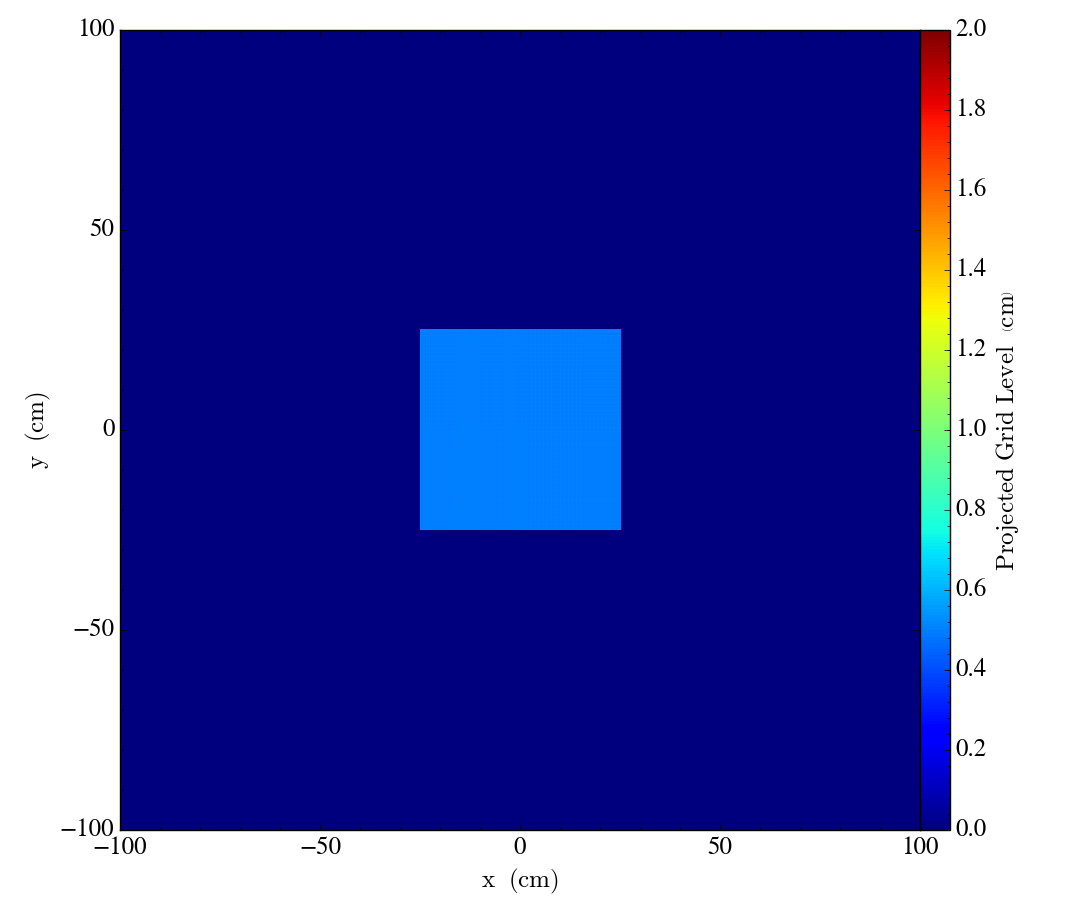

In [38]:
p = yt.ProjectionPlot(ds, "z", "grid_level")
#p.set_figure_size(2)
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
p.set_zlim("all", 0, 2)
p.show()

yt : [INFO     ] 2016-04-19 18:27:47,559 SimulationIO: Reading field "GRID::x"
yt : [INFO     ] 2016-04-19 18:27:47,564 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:47,565 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:47,568 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:47,568 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:47,570 Making a fixed resolution buffer of (('simulationio', 'GRID::x')) 800 by 800
yt : [WARNING  ] 2016-04-19 18:27:47,627 Plot image for field ('simulationio', 'GRID::x') has both positive and negative values. Min = -0.875000, Max = 0.875000.
yt : [WARNING  ] 2016-04-19 18:27:47,628 Switching to symlog colorbar scaling unless linear scaling is specified later



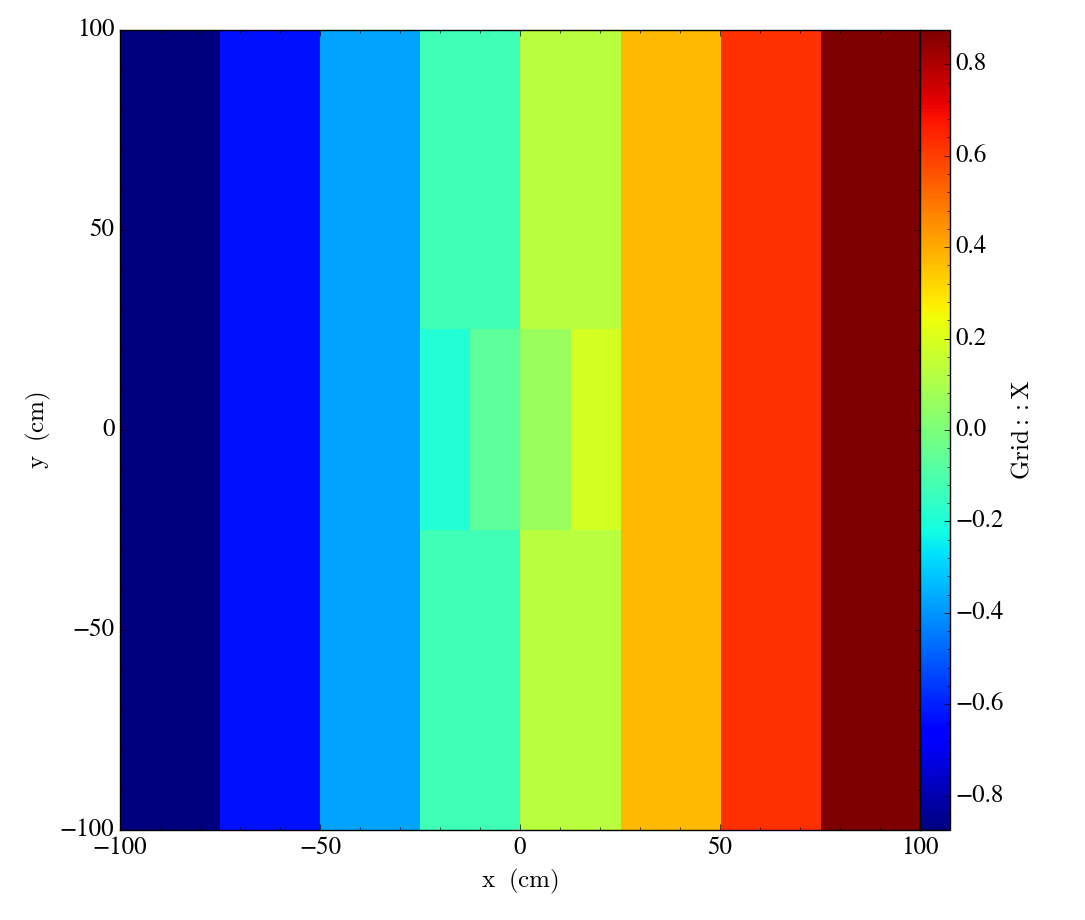

In [39]:
p = yt.SlicePlot(ds, "z", "GRID::x",center=[0,0,0])
#p.set_figure_size(2)
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
#p.set_zlim("all",)
p.show()

yt : [INFO     ] 2016-04-19 18:27:48,618 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:48,619 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:48,623 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:48,624 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:48,626 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800



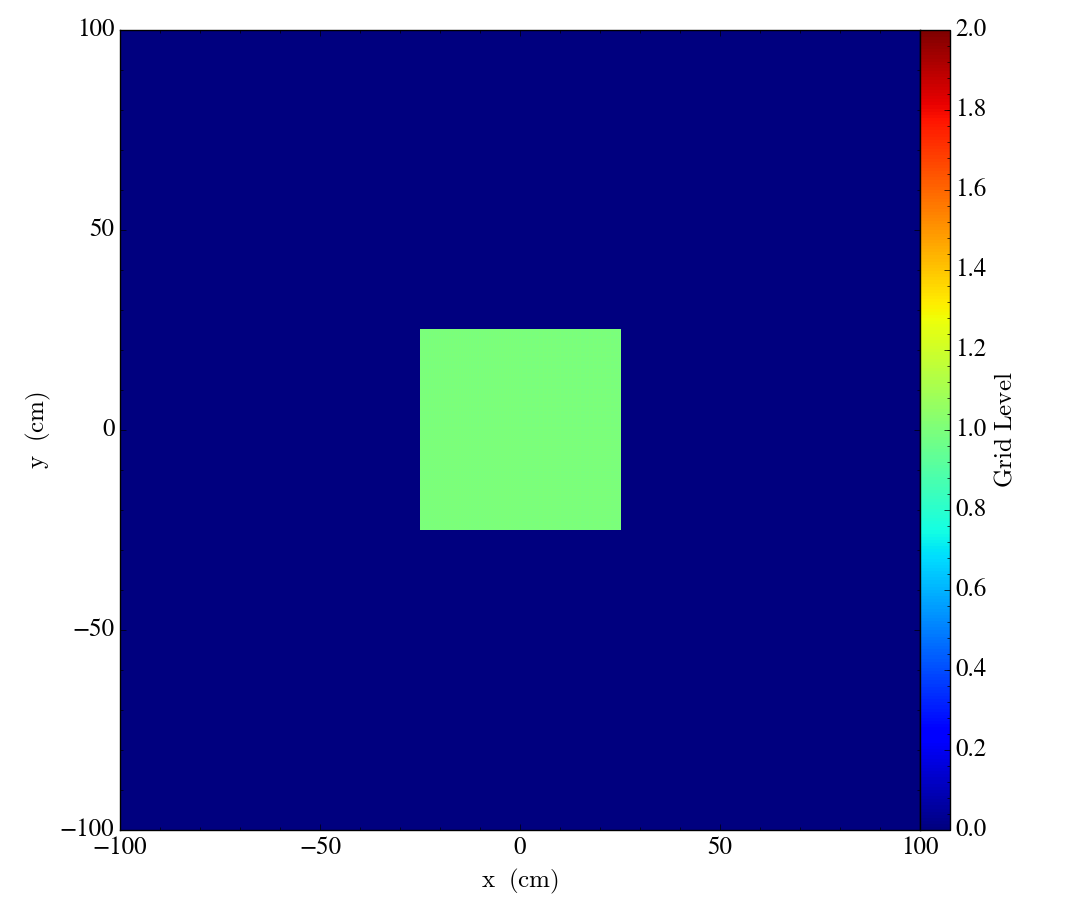

In [40]:
p = yt.SlicePlot(ds, "z", "grid_level",center=[0,0,0])
#p.set_figure_size(2)
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
p.set_zlim("all", 0, 2)
p.show()

yt : [INFO     ] 2016-04-19 18:27:49,807 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-19 18:27:49,809 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:49,810 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:49,814 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:49,817 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:49,818 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800
/home/jmiller/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:824: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)



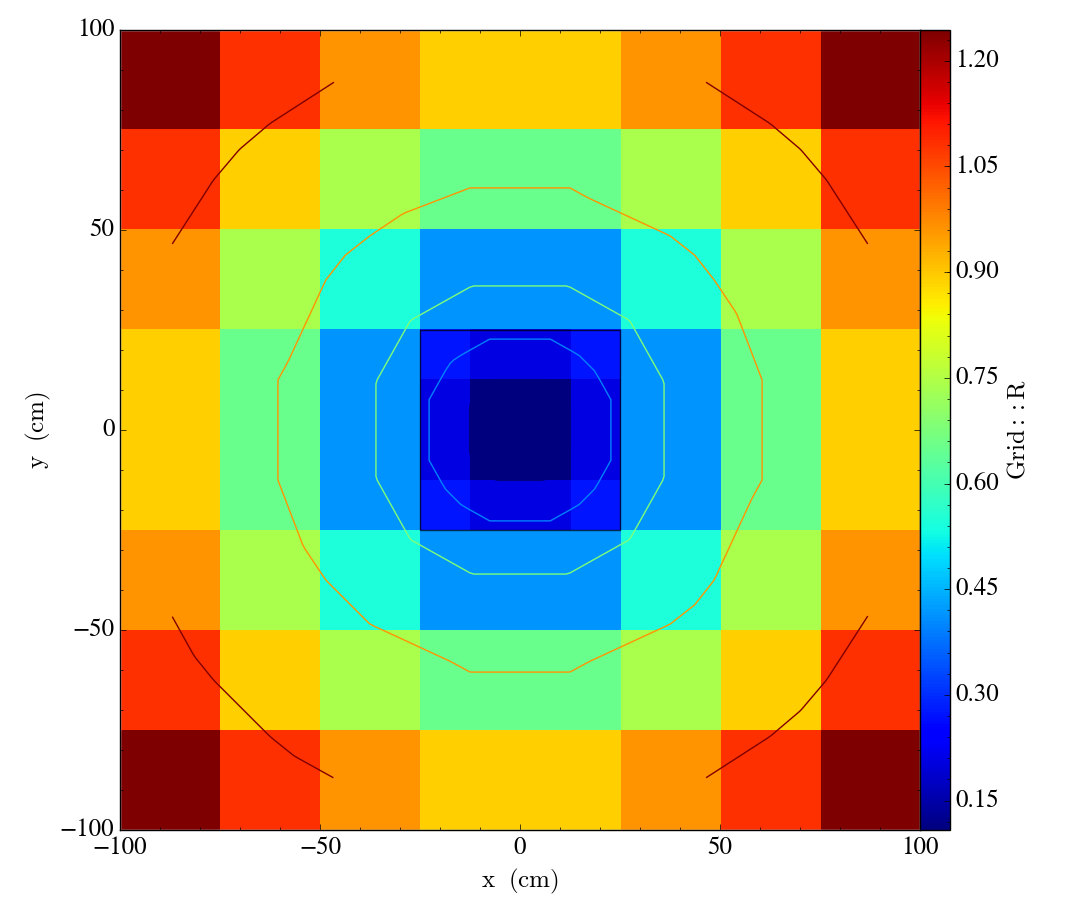

In [41]:
p = yt.SlicePlot(ds, "z", "GRID::r",center=[0,0,0])
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
#p.set_zlim("all", 0, 2)
p.annotate_grids()
p.annotate_contour('GRID::r')
#p.save("GRID-r.png")
p.show()

yt : [INFO     ] 2016-04-19 18:27:50,906 SimulationIO: Reading field "GRID::x"
yt : [INFO     ] 2016-04-19 18:27:50,909 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:50,910 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:50,914 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:50,916 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:50,918 Making a fixed resolution buffer of (('simulationio', 'GRID::x')) 800 by 800
yt : [WARNING  ] 2016-04-19 18:27:50,960 Plot image for field ('simulationio', 'GRID::x') has both positive and negative values. Min = -0.875000, Max = 0.875000.
yt : [WARNING  ] 2016-04-19 18:27:50,961 Switching to symlog colorbar scaling unless linear scaling is specified later



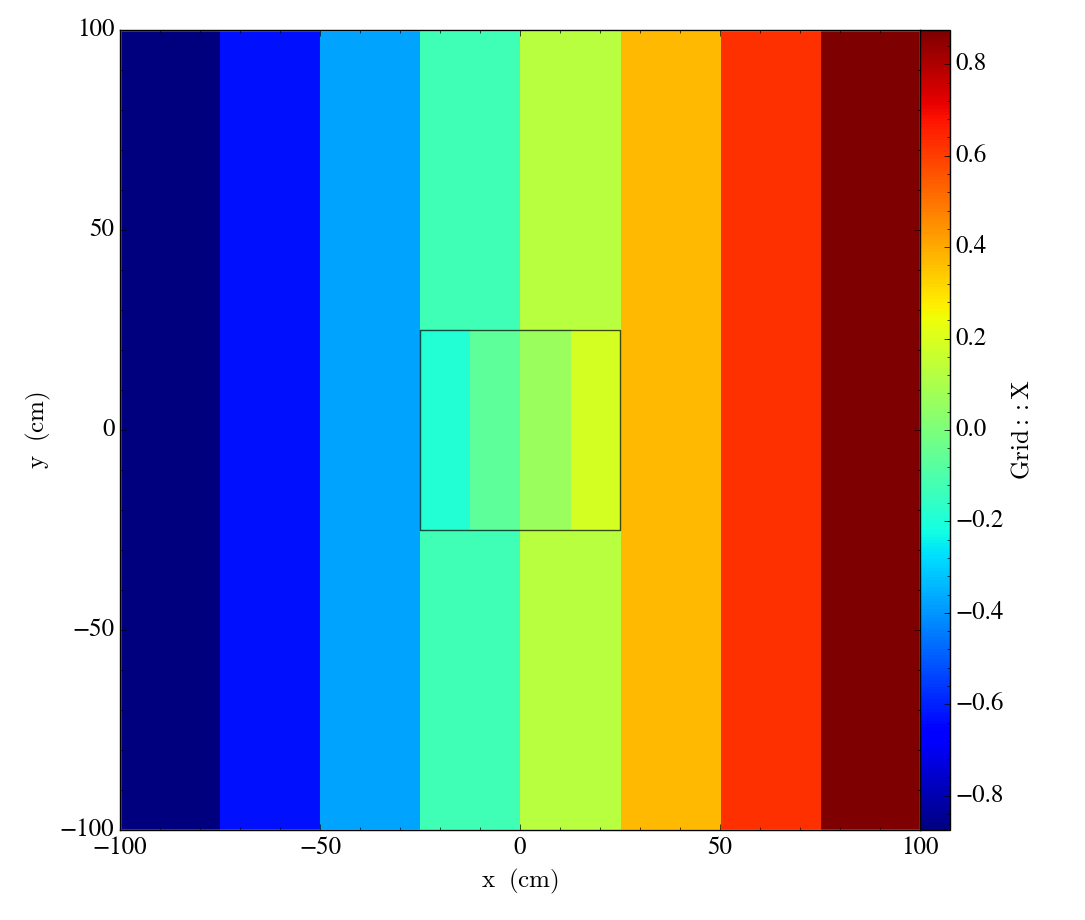

In [42]:
p = yt.SlicePlot(ds, "z", "GRID::x",center=[0,0,0])
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
#p.set_zlim("all", 0, 2)
p.annotate_grids()
#p.save("GRID-r.png")
p.show()

yt : [INFO     ] 2016-04-19 18:27:52,409 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-19 18:27:52,413 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:52,418 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:52,421 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:52,422 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:52,424 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800
yt : [INFO     ] 2016-04-19 18:27:52,899 SimulationIO: Reading field "GRID::x"
yt : [INFO     ] 2016-04-19 18:27:52,902 SimulationIO: Reading field "GRID::y"



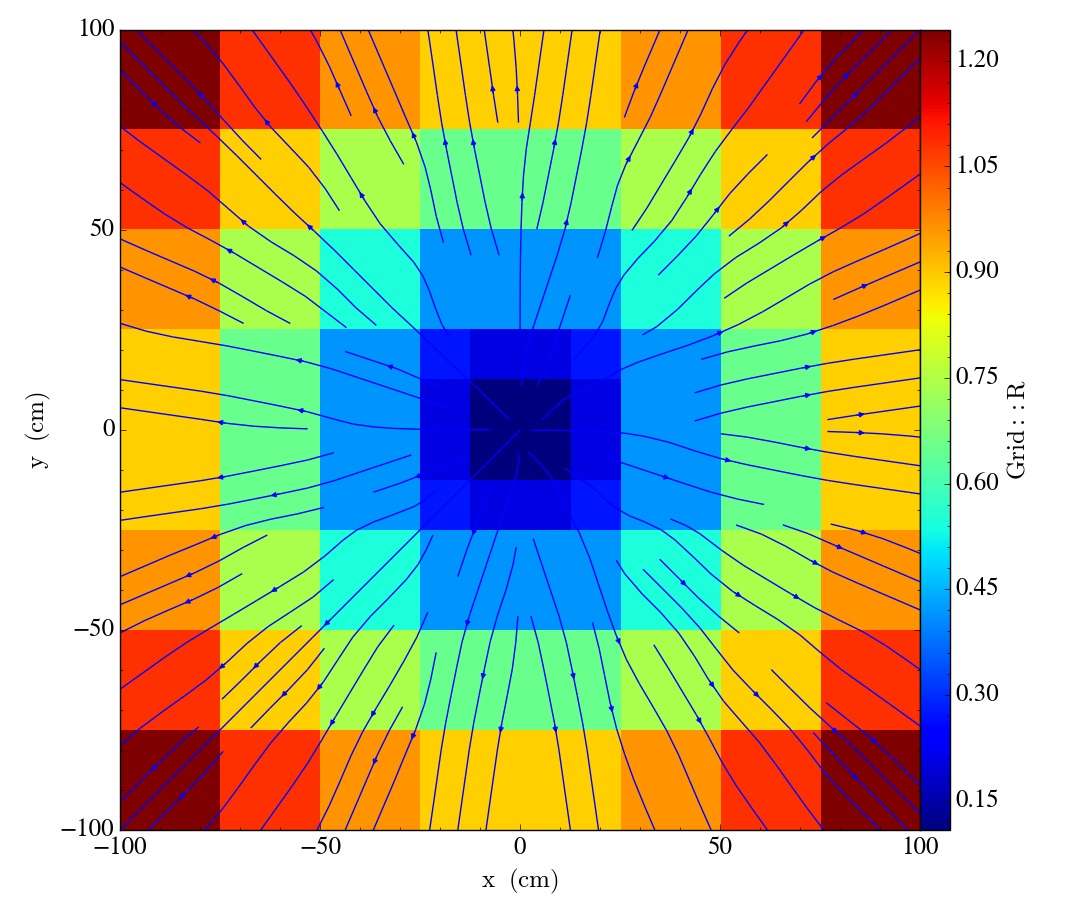

In [43]:
p = yt.SlicePlot(ds, "z", "GRID::r")
p.set_cmap(field="all", cmap="jet")
p.annotate_streamlines("GRID::x", "GRID::y")
p.set_log("all", False)
p.show()

yt : [INFO     ] 2016-04-19 18:27:54,566 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-19 18:27:54,572 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:54,573 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:54,577 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:54,577 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-19 18:27:54,582 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800



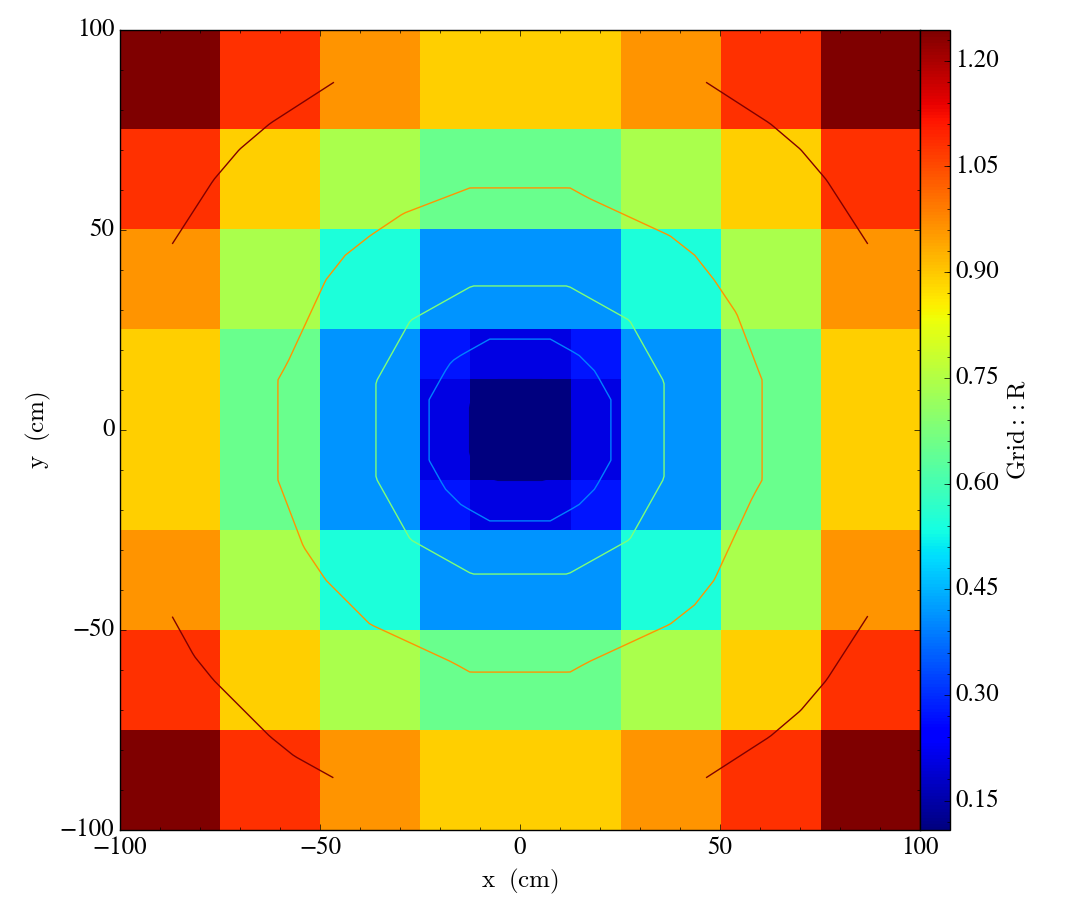

In [44]:
p = yt.SlicePlot(ds, "z", "GRID::r")
p.set_cmap(field="all", cmap="jet")
p.annotate_contour("GRID::r")
p.set_log("all", False)
p.show()

In [47]:
im, sc = yt.volume_render(ds,'GRID::r')

yt : [INFO     ] 2016-04-19 18:46:34,410 Creating default volume
yt : [INFO     ] 2016-04-19 18:46:34,416 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-19 18:46:34,421 Creating default transfer function
yt : [INFO     ] 2016-04-19 18:46:34,421 Calculating data bounds. This may take a while.  Set the .bounds to avoid this.
yt : [INFO     ] 2016-04-19 18:46:34,423 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-19 18:46:34,432 Rendering scene (Can take a while).
yt : [INFO     ] 2016-04-19 18:46:34,876 Saving render iof5-refined-cell-simple.s5_Render_GRID::r.png


In [ ]:
ds.index.grids[1].fcoords.min(axis=0)

In [ ]:
ds.index.grids[0]['GRID::x'].min(),ds.index.grids[0]['GRID::y'].min(),ds.index.grids[0]['GRID::z'].min()

In [ ]:
ds.index.grids[1]['GRID::x'].min(),ds.index.grids[1]['GRID::y'].min(),ds.index.grids[1]['GRID::z'].min()

In [ ]:
ds.index.grids[0].LeftEdge

In [ ]:
dd = ds.all_data()

In [ ]:
for chunk in dd.chunks([], "all"): 
    print chunk.fcoords.min(axis=0)

In [ ]:
ds.index.grids[0].LeftEdge-ds.index.grids[0].dds/2

In [ ]:
ds.index.grids[1].fcoords.min(axis=0)